In [1]:
import torch
from torch.functional import F
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

In [2]:
class SVM(torch.nn.Module):

    def __init__(self):
        super().__init__()  # Call the init function of nn.Module
        self.fully_connected = nn.Linear(2, 1)  # Implement the Linear function
        
    def forward(self, x):
        fwd = self.fully_connected(x)  # Forward pass
        return fwd
 

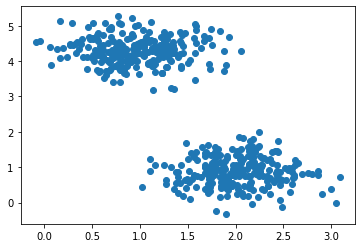

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate toy data that has two distinct classes and a huge gap between them
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.4)  # X - features, Y - labels
# Plot the toy data
plt.scatter(x=X[:, 0], y=X[:, 1])

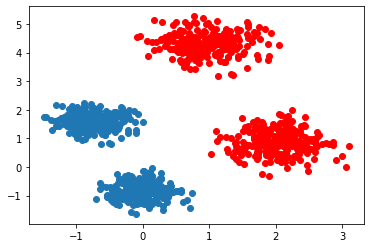

In [4]:
data = X  # Before feature scaling
X = (X - X.mean())/X.std()  # Feature scaling
Y[Y == 0] = -1  # Replace zeros with -1
plt.scatter(x=X[:, 0], y=X[:, 1])  # After feature scaling
plt.scatter(x=data[:, 0], y=data[:, 1], c='r')  # Before feature scaling

In [9]:

learning_rate = 0.1  # Learning rate
epoch = 10  # Number of epochs
batch_size = 1  # Batch size

X = torch.FloatTensor(X)  # Convert X and Y to FloatTensors
Y = torch.FloatTensor(Y)
N = len(Y)  # Number of samples, 500

model = SVM()  # Our model
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Our optimizer
model.train()  # Our model, SVM is a subclass of the nn.Module, so it inherits the train method

for epoch in range(epoch):
    perm = torch.randperm(N)  # Generate a set of random numbers of length: sample size
    sum_loss = 0  # Loss for each epoch
        
    for i in range(0, N, batch_size):
        x = X[perm[i:i + batch_size]]  # Pick random samples by iterating over random permutation
        y = Y[perm[i:i + batch_size]]  # Pick the correlating class
        
        x = Variable(x)  # Convert features and classes to variables
        y = Variable(y)

        optimizer.zero_grad()  # Manually zero the gradient buffers of the optimizer
        output = model(x)  # Compute the output by doing a forward pass
        
        loss = torch.mean(torch.clamp(1 - output * y, min=0))  # hinge loss if change the loss function， it is not svm
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize and adjust weights

        sum_loss += loss.data.cpu().numpy()  # Add the loss
        
    print("Epoch {}, Loss: {}".format(epoch, sum_loss))

Epoch 0, Loss: 6.817412853240967
Epoch 1, Loss: 0.3569874167442322
Epoch 2, Loss: 0.10593891143798828
Epoch 3, Loss: 0.12638002634048462
Epoch 4, Loss: 0.05589592456817627
Epoch 5, Loss: 0.0
Epoch 6, Loss: 0.0
Epoch 7, Loss: 0.0
Epoch 8, Loss: 0.0
Epoch 9, Loss: 0.0
